In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_context('talk')

# Import user_profile as a library
# some_file.py
import sys
sys.path.insert(0, '/home/trangel/user-profile-tonatiuh-latest/stats-core')
import vehicle 
import battery 
import vehicle_stats

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
header = pd.read_csv('../data/aglog_header.csv',index_col=0)
zero = 0.000001 #1e-6 



#AG2
#infile = '../data/tmp-LMGGN1S5XG1004277-20180113.csv'
#infile2 = '../data/tmp-LMGGN1S5XG1004277-20180114.csv'

# AG1
infile = '../data/tmp-LMGGN1S59G1004108-20170921.csv'
infile2 = '../data/tmp-LMGGN1S59G1004108-20170922.csv'


SDATE = '2017-09-20'
EDATE = '2017-09-23'

df = pd.read_csv(infile,header=None)
del df[85] #skip last column
df.columns = header.Column.values
print(len(df))


df2 = pd.read_csv(infile2,header=None)
del df2[85] #skip last column
df2.columns = header.Column.values
print(len(df2))

df = df.append(df2)
print(len(df))
df.head()

4025
5102
9127


,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
0,LMGGN1S59G1004108,1505953010222,20170921,12.0,-5.0,348.0,0.0,1000.0,3.97,3.96,...,39.128300,117.268760,39.129295,NaN,NaN,46.0,0.0,0.0,0.0,0.0
1,LMGGN1S59G1004108,1505952829638,20170921,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128283,117.268760,39.129278,NaN,NaN,46.0,0.0,0.0,0.0,0.0
2,LMGGN1S59G1004108,1505952839638,20170921,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128280,117.268760,39.129275,NaN,NaN,46.0,0.0,0.0,0.0,0.0
3,LMGGN1S59G1004108,1505952869796,20170921,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128286,117.268744,39.129281,NaN,NaN,46.0,0.0,0.0,0.0,0.0
4,LMGGN1S59G1004108,1505953280831,20170921,12.0,-5.0,349.0,0.0,1000.0,3.97,3.96,...,39.128305,117.268766,39.129300,NaN,NaN,46.0,0.0,0.0,0.0,0.0


In [3]:
df['SDATE'] = pd.to_datetime(df['SDATE'].astype(str),
                             utc=True).dt.tz_convert('Asia/Hong_Kong').dt.date


df.index = pd.to_datetime(df['TDATE'], unit='ms',
                             utc=True).dt.tz_convert('Asia/Hong_Kong')

<a = 'analysis'></a>    
# Stats on few days

In [4]:
# Select distinct values of Sdate
#SDATES = df.SDATE.unique()
# Take first date
#SDATE = SDATES[0]


SDATE = pd.to_datetime(SDATE).date()
EDATE = pd.to_datetime(EDATE).date()


filter1 = df.SDATE >= SDATE
filter2 = df.SDATE <= EDATE

df1 = df[ filter1 & filter2 ]
#df1 = df[filter2]
df1.head()

,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
TDATE,,,,,,,,,,,,,,,,,,,,,
2017-09-21 08:16:50.222000+08:00,LMGGN1S59G1004108,1505953010222,2017-09-21,12.0,-5.0,348.0,0.0,1000.0,3.97,3.96,...,39.128300,117.268760,39.129295,NaN,NaN,46.0,0.0,0.0,0.0,0.0
2017-09-21 08:13:49.638000+08:00,LMGGN1S59G1004108,1505952829638,2017-09-21,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128283,117.268760,39.129278,NaN,NaN,46.0,0.0,0.0,0.0,0.0
2017-09-21 08:13:59.638000+08:00,LMGGN1S59G1004108,1505952839638,2017-09-21,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128280,117.268760,39.129275,NaN,NaN,46.0,0.0,0.0,0.0,0.0
2017-09-21 08:14:29.796000+08:00,LMGGN1S59G1004108,1505952869796,2017-09-21,12.0,-5.0,347.0,0.0,1000.0,3.96,3.95,...,39.128286,117.268744,39.129281,NaN,NaN,46.0,0.0,0.0,0.0,0.0
2017-09-21 08:21:20.831000+08:00,LMGGN1S59G1004108,1505953280831,2017-09-21,12.0,-5.0,349.0,0.0,1000.0,3.97,3.96,...,39.128305,117.268766,39.129300,NaN,NaN,46.0,0.0,0.0,0.0,0.0


# Use vehicle class

In [5]:
from importlib import reload
reload(vehicle)

veh = vehicle.Vehicle(data_file = df1, header_file = list(df1.columns.values), do_sort=False)
veh.add_cellvoltdiff()
veh.set_charging_driving_dfs()
Nc = len(veh.df_charge)
Nd = len(veh.df_drive)
Ndb = len(veh.df_drive_on_batt)
print('Nc {}'.format(Nc))
print('Nd {}'.format(Nd))
print('Ndb {}'.format(Ndb))

Nc 6476
Nd 2587
Ndb 2457


# Visualize charging and driving periods

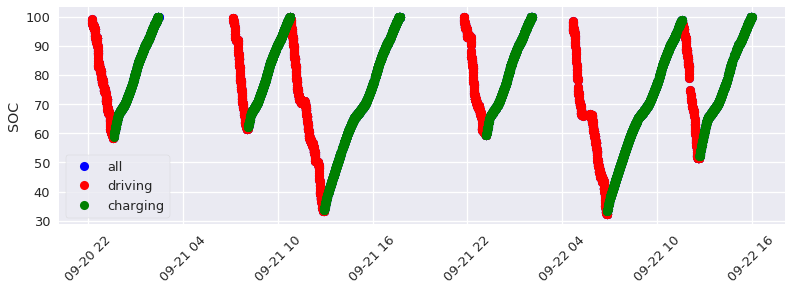

In [6]:
sns.set(rc={"figure.figsize": (13, 4)})
sns.set_context('talk')

SDATE = '2017-09-20'
SDATE = pd.to_datetime(SDATE).date()

filter1 = veh.df_drive.SDATE > SDATE
ts_drive = veh.df_drive[filter1]

filter1 = veh.df_charge.SDATE > SDATE
ts_charge = veh.df_charge[filter1]

filter1 = df1.SDATE > SDATE
ts = df1[filter1]

f, (ax) = plt.subplots(1)

ax.plot(ts['BMS_BATTSOC'], 'bo', label='all')
ax.plot(ts_drive['BMS_BATTSOC'], 'ro', label='driving')
ax.plot(ts_charge['BMS_BATTSOC'], 'go', label='charging')

ax.legend(loc=0, frameon=True)
ax.set_ylabel('SOC')
plt.xticks(rotation=45)
sns.despine()

## Use battery module

In [7]:
from importlib import reload
reload(battery)
batt = battery.Battery()

end_date = '2017-09-22'
end_date = pd.to_datetime(end_date).date()

batt.find_trips_on_battery(df_drive_on_batt=veh.df_drive_on_batt, end_date = end_date)


nperiods = len(batt.trips)
print("{} trips found".format(nperiods))

#print(batt.find_charging_periods.__doc__)

3 trips found


In [8]:
db1 = batt.trips[0]
db1.index = db1.TDATE

db2 = batt.trips[1]
db2.index = db2.TDATE

db3 = batt.trips[2]
db3.index = db3.TDATE


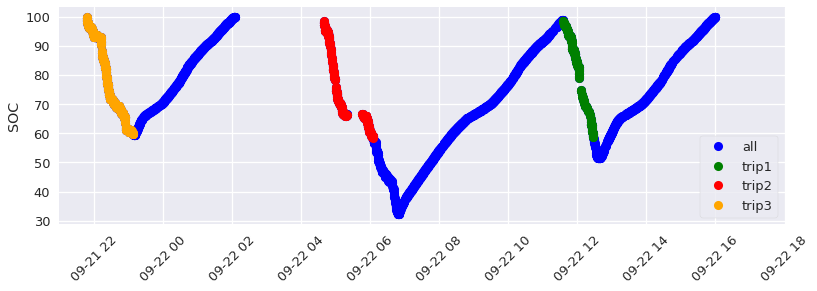

In [9]:
f, (ax) = plt.subplots(1)

ax.plot(ts['BMS_BATTSOC'], 'bo', label='all')
ax.plot(db1['BMS_BATTSOC'], 'go', label='trip1')
ax.plot(db2['BMS_BATTSOC'], 'o', color='red', label='trip2')
ax.plot(db3['BMS_BATTSOC'], 'o', color='orange', label='trip3')


ax.set_xlim('2017-09-21T21', '2017-09-22T18')
ax.legend(loc=0, frameon=True)
ax.set_ylabel('SOC')
plt.xticks(rotation=45)
sns.despine()

Text(0.5,0,'I (A)')

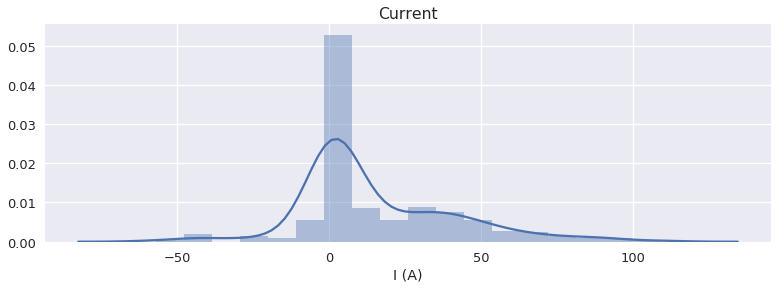

In [10]:
sns.set(rc={"figure.figsize": (13, 4)})
sns.set_context('talk')

x = db1['BMS_BATTCURR']
ax = sns.distplot(x)
ax.set_title('Current')
ax.set_xlabel('I (A)')

# Get statistics

In [11]:
from importlib import reload
reload(vehicle_stats)
reload(battery)

batt = battery.Battery()


end_date = '2017-09-22'
end_date = pd.to_datetime(end_date).date()
batt.find_trips_on_battery(df_drive_on_batt=veh.df_drive_on_batt, end_date = end_date)

nperiods = len(batt.trips)
print("{} periods found".format(nperiods))

db1 = batt.trips[0]
db1.index = db1.TDATE

db2 = batt.trips[1]
db2.index = db2.TDATE

db3 = batt.trips[2]
db3.index = db3.TDATE

trip_stats = batt.get_battery_stats(which_stats=1)
#charging_stats

3 periods found


In [12]:
df_stats = pd.DataFrame(trip_stats)
df_stats['delta_soc'] = df_stats['start_soc'] - df_stats['end_soc']
df_stats

,acc_pedal_pst_mean,acc_pedal_pst_p99,acc_pedal_pst_std,batt_temp_avg,batt_temp_max,batt_temp_min,capacity_charged,capacity_discharged,capacity_throughput,count_records,...,start_date,start_odometer,start_soc,start_time,total_time,v_diff_mean,v_diff_p1,v_diff_p99,v_diff_std,delta_soc
0,6.225225,49.97,11.370396,36.645652,39.0,33.0,-2.453661,13.414614,15.862249,230,...,2017-09-22,31065,98.6,2017-09-22 19:35:25.183000+08:00,0.798056,0.012297,0.01,0.0200,0.004474,39.8
1,8.051370,43.94,12.040350,32.583882,34.0,30.0,-2.496005,18.839338,21.267677,304,...,2017-09-22,31010,98.5,2017-09-22 12:39:31.078000+08:00,0.968889,0.013288,0.01,0.0200,0.005268,40.0
2,7.837333,58.00,14.719869,29.784062,32.0,28.0,-3.522884,21.997036,25.252026,389,...,2017-09-22,30978,99.8,2017-09-22 05:47:36.003000+08:00,1.227778,0.012480,0.00,0.0212,0.004864,39.9


In [13]:
counts = df_stats['count_records']
time_sum = counts * 10 / 3600.
print(time_sum)
print(df_stats['total_time']*60.)
df_stats['end_time'] - df_stats['start_time']

0    0.638889
1    0.844444
2    1.080556
Name: count_records, dtype: float64
0    47.883333
1    58.133333
2    73.666667
Name: total_time, dtype: float64


0   00:52:26.561000
1   01:25:15.147000
2   01:21:11.211000
Name: end_time, dtype: timedelta64[ns]

In [14]:
df_stats['energy_discharged'] + df_stats['energy_charged']

0    3.751592
1    5.575425
2    6.302132
dtype: float64

In [15]:
import datetime
df = db2.copy()
df['TDELTA'] = df.TDATE.diff().fillna(datetime.timedelta(seconds=10))
df['TDELTA'] = df.loc[:,('TDELTA')].apply(lambda x: x.days*3600*24 + x.seconds).copy() #convert to seconds
# Remove records with TDELTA < 5s (usually duplicated rows):
df2 = df[df.TDELTA.abs() > 5].copy()


# We need to sort in ascencing order to check later if there are jumps and reset time
if df2['TDATE'][0] > df2['TDATE'][1]: # if ordered in descending order
    df2.sort_values(by='TDATE', inplace=True)
df2.head()

,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING,BMS_CELLVOLTDIFF,TDELTA
TDATE,,,,,,,,,,,,,,,,,,,,,
2017-09-22 12:39:31.078000+08:00,LMGGN1S59G1004108,2017-09-22 12:39:31.078000+08:00,2017-09-22,4.0,0.0,363.0,0.0,1000.0,4.14,4.12,...,39.128818,0.0,0.0,36.0,0.0,1.0,0.0,0.0,0.02,-10
2017-09-22 12:39:41.078000+08:00,LMGGN1S59G1004108,2017-09-22 12:39:41.078000+08:00,2017-09-22,4.0,1.0,363.0,0.0,1000.0,4.14,4.12,...,39.128809,0.0,0.0,36.0,0.0,1.0,0.0,0.0,0.02,-10
2017-09-22 12:39:51.078000+08:00,LMGGN1S59G1004108,2017-09-22 12:39:51.078000+08:00,2017-09-22,4.0,3.0,363.0,0.0,1000.0,4.14,4.12,...,39.128837,0.0,0.0,36.0,0.0,1.0,0.0,0.0,0.02,-11
2017-09-22 12:40:01.138000+08:00,LMGGN1S59G1004108,2017-09-22 12:40:01.138000+08:00,2017-09-22,4.0,35.0,359.0,0.0,1000.0,4.09,4.08,...,39.128840,0.0,0.0,36.0,0.0,1.0,0.0,268.0,0.01,-10
2017-09-22 12:40:11.138000+08:00,LMGGN1S59G1004108,2017-09-22 12:40:11.138000+08:00,2017-09-22,4.0,0.0,362.0,0.0,1022.0,4.12,4.11,...,39.128815,0.0,0.0,36.0,0.0,1.0,0.0,269.0,0.01,-10


In [16]:
from scipy import integrate, special
# For energy_throughput
c_ethr = 2.777777777777778e-06 # 10.0 seconds * (1 hour / 3600.0 seconds) * (1 kW / 1000 W)
ctte_et = (1. / 3600.) * (1. / 1000)
ctte_ah = (1. / 3600.)

v = df2['BMS_BATTVOLT']
i = df2['BMS_BATTCURR']
t = df2['TDATE']
iabs = i.abs()  # Absolute value of current
p = iabs * v
p.sum() * c_ethr

mindt = t.min()
seconds = t.apply(lambda x: (x - mindt).seconds )
seconds.head()

from scipy.interpolate import interp1d
# ET
tt = seconds.copy().values
pp = p.values 

f = interp1d(tt, pp, kind='linear') 

# Ah
#tt = seconds.values
#ii = iabs.values 
#gg = interp1d(tt, ii, kind='cubic') 

#def et(ss):
#    return ff(ss)

#def ah(ss):
#    return gg(ss)

#result = integrate.quad(lambda x: et(x), tt.min(), tt.max()) * ctte_et
#print('ET ', result)

#result = integrate.quad(lambda x: ah(x), tt.min(), tt.max()) * ctte_ah

#print('Ah ', result)

(seconds.max() - seconds.min()) / 60


85.25

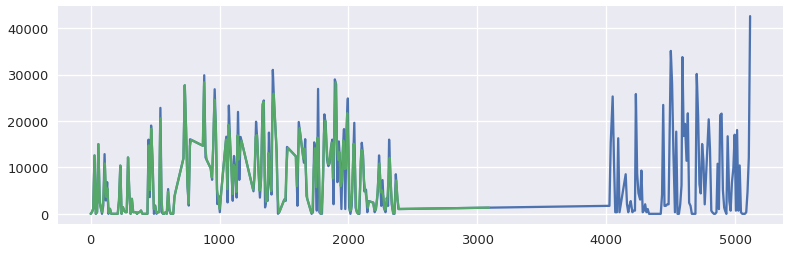

In [17]:
sns.set(rc={"figure.figsize": (13, 4)})
sns.set_context('talk')

x = np.arange(0, 3100, 10)
y = f(x)
plt.plot(tt, pp)
plt.plot(x, y)

In [18]:
tt = seconds.copy().values
t_diff = np.diff(tt)
t_diff1 = t_diff.copy()
print(t_diff[t_diff > 120])
print('indices', np.argwhere(t_diff > 120))


offset = 0
for i1, value in enumerate(t_diff):
    i2 = i1 + 1
    if value > 120:
        offset = offset - value + 10 # remove big jump (-value) and add 10s
    tt[i2] = tt[i2] + offset

t_diff = np.diff(tt)
#print(list(zip(t_diff1, t_diff)))
#np.argwhere(t_diff > 120)


[1637]
indices [[190]]


In [19]:
from scipy.interpolate import interp1d

# Check SOC each min
soc = df2['BMS_BATTSOC'].values
t = df2['TDATE']
mindt = t.min()
seconds = t.apply(lambda x: (x - mindt).seconds )
tt = seconds.values
 

f = interp1d(tt, soc, kind='linear') 

x = np.arange(0, tt.max(), 10)
y = f(x)
#plt.plot(tt, soc)


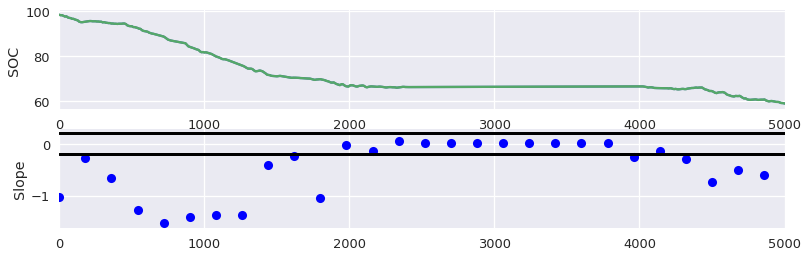

In [20]:
mins = np.arange(0, tt.max()/60, 3)
soc_mins = f(mins * 60)

mins_diff = np.diff(mins)
soc_diff = np.diff(soc_mins)
slope = soc_diff / mins_diff

sns.set(rc={"figure.figsize": (13, 4)})
sns.set_context('talk')

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(x, y)
ax1.plot(tt, soc)
ax2.plot(mins[:len(mins)-1]*60, slope, 'bo', label='m')
ax2.axhline(y=-0.2, linewidth=3, color='black')
ax2.axhline(y=0.2, linewidth=3, color='black')

ax1.set_xlim(0, 5000)
ax2.set_xlim(0, 5000)

ax2.set_ylabel('Slope')
ax1.set_ylabel('SOC')
sns.despine()
